In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
DATA_PATH = 'H:\\Python\\NetologyHW\\4-1\\names\\'

Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [19]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'], verify_integrity=True)
# print(names_all)

In [20]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
# print(name_dynamics)

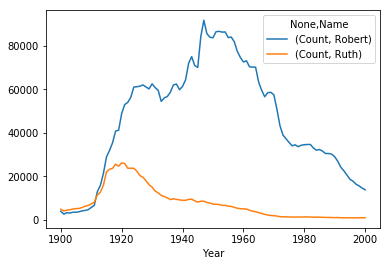

In [21]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

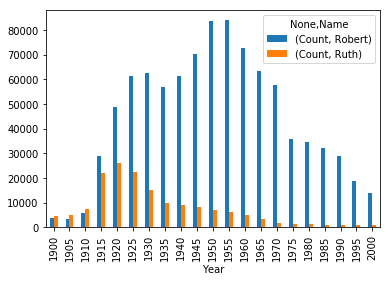

In [22]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'], verify_integrity=True)
name_dynamics_5 = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics_5.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [23]:
names = pd.read_csv(
    DATA_PATH + 'yob1950.txt', 
    names=['Name','Gender','Count']
)

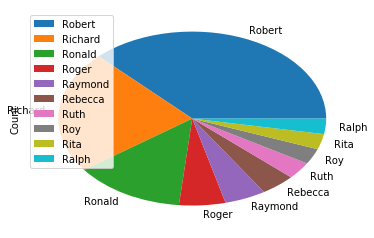

In [24]:
names.groupby('Name').sum().query('Name.str[0] == "R"').sort_values(by='Count', ascending=False).head(10).plot.pie(y='Count')


          Name  Count  Consonants
0        Aaron    183           2
1        Abbie    199           2
2         Abby     13           3
3          Abe    104           1
4         Abel     28           2
5      Abigail     27           3
6        Abner     46           3
7      Abraham    162           4
8        Abram     26           3
9        Abron      5           3
10         Ace      8           1
11        Acie     18           1
12         Acy      6           2
13         Ada   2014           1
14    Adabelle      5           4
15        Adah     61           2
16     Adaline     43           3
17        Adam    182           2
18        Adda     20           2
19       Addie    957           2
20     Addison     20           4
21        Adel      8           2
22       Adela     73           2
23    Adelaida      8           3
24    Adelaide    330           3
25     Adelard      6           4
26    Adelbert     13           5
27       Adele    343           2
28      Adelia

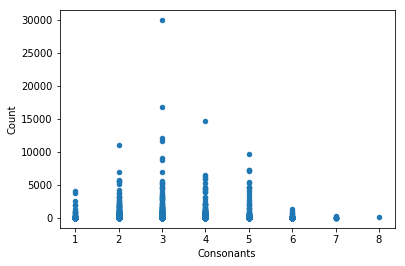

In [54]:
names_by_year = []
for year in range(1900, 1902):
    names = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=['Name','Gender','Count'])
    names_by_year.append(names)
    
names_all = pd.concat(names_by_year).groupby('Name', as_index=False).sum()
cons = list("bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ")
 
names_all['Consonants'] = names_all.apply(lambda row: sum((row.Name).count(c) for c in cons), axis=1)
print(names_all)
names_all.plot.scatter(x='Consonants', y='Count')